# Lab - Parallel Computing Part 4 - CUDA Classifier Inference
## E6692 Spring 2022


In this part we implement a basic CNN classifier that uses the layers we defined in Part 1 to complete a forward pass. We transfer the weights from the trained **PyTorchClassifier** to **CUDAClassifier** to perform inference.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

from utils.models import CUDAClassifier, PyTorchClassifier
from utils.dataset import load_mnist_dataset, display_image, BATCH_SIZE

# define kernel path
kernel_path = './kernels.cu'

%load_ext autoreload
%autoreload 2

%matplotlib inline

TODO: Implement the functions **CUDAClassifier.load_state_dict()** and **CUDAClassifier.forward()** in **utils/models.py**.

In the following cell we read the PyTorch saved weights:

In [ ]:
state_dict_path = './models/classification' # define weights path
state_dict = torch.load(state_dict_path)


TODO: Create an instance of CUDAClassifier and use the **load_state_dict()** function to load the saved weights from **PyTorchClassifier** that were trained in Part 3. 

In [ ]:
# TODO: load the trained weights with CUDAClassifier.load_state_dict()

cuda_model = CUDAClassifier(kernel_path)


In [ ]:
################################################################
######## CUDAClassifier.load_state_dict() TEST CASES ###########
################################################################

pytorch_model = PyTorchClassifier()
pytorch_model.load_state_dict(torch.load(state_dict_path))
pytorch_state_dict = pytorch_model.state_dict()
pytorch_weight_keys = pytorch_state_dict.keys()
cuda_state_dict = cuda_model.state_dict
cuda_model_keys = cuda_state_dict.keys()

print("All CUDA model and PyTorch model keys match: ", pytorch_weight_keys == cuda_model_keys )

passing = True
for key, cuda_weight in cuda_state_dict.items():
    if not np.allclose(pytorch_state_dict[key].numpy(), cuda_weight):
        passing = False
        break

print("All CUDA model and PyTorch model weights match: ", passing)

################################################################
################ DO NOT MODIFY THE CODE ABOVE ##################
################################################################

In [ ]:
################################################################
############ CUDAClassifier.forward() TEST CASES ###############
################################################################

_, val_set = load_mnist_dataset()

sample_images, sample_labels = iter(val_set).next()
sample_images_grid = torchvision.utils.make_grid(sample_images)
display_image(sample_images_grid, title="Test images")

for i in range(BATCH_SIZE):
    
    x = np.transpose(sample_images[i], (1, 2, 0)).numpy()
    cuda_x = cuda_model(x)
    cuda_prediction = np.argmax(cuda_x)
    torch_x = torch_model(sample_images[i].unsqueeze(dim=0)).detach().squeeze(dim=0).squeeze(dim=0).numpy()
    torch_prediction = np.argmax(torch_x)
    
    print("CUDAClassifier.forward() Test Case {} Passed: ".format(i + 1), np.allclose(cuda_x, torch_x))
    print("CUDA model prediction: ", cuda_prediction)
    print("PyTorch model prediction: ", torch_prediction)
    print()
    
################################################################
################ DO NOT MODIFY THE CODE ABOVE ##################
################################################################

### Discussion

#### 1. Why is a transfer of trained parameters between different types of models with the same structure useful?

TODO: your answer here.

#### 2. What would happen if we tried to train CUDAClassifier directly? Would it be able to train successfully? In either case, explain your reasoning.

TODO: your answer here.

#### 3. If you answered yes (CUDAClassifier would successfully train) for 2, what about its implementation allows this to be possible? If you answered no (CUDAClassifier cannot successfully train) for 2, what needs to happen to make training possible?

TODO: your answer here.

#### 4. Insert your favorite ML/AI/GPU hardware Meme 

TODO: Your meme here.

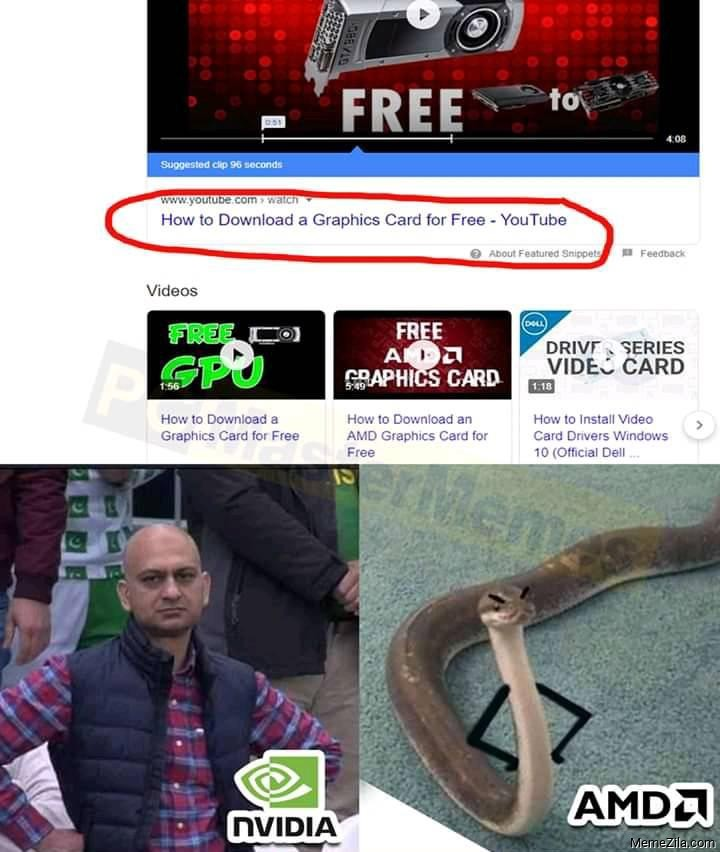